## Evaluating Log Files

In [60]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import os
from scipy.interpolate import make_interp_spline

In [43]:
for file in os.listdir('./log'):
    print(file)

Figures
log_file (2).csv
log_file _17_epochs and .csv
log_file.csv
log_file_120 epoch-1e-4 and 32 batch size.csv
log_file_149 epoch.csv
log_file_150Epoch  64 batch 1e-3.csv
log_file_151 epoch and 100 epoch 1e-4 and 50 epoch 1e-3.csv
log_file_16 batch size for 100 epochs.csv
log_file_19 epoch testing.csv
log_file_67 epoch, 50 epoch (data for 50 epoch).csv
log_file_saved.csv


In [76]:
csv_file_name = "log_file_149 epoch"
log_df = pd.read_csv(f"./log/{csv_file_name}.csv")
log_df.tail(5)

,epoch,conf_accuracy,conf_loss,loc_accuracy,loc_loss,loss,lr,val_conf_accuracy,val_conf_loss,val_loc_accuracy,val_loc_loss,val_loss
145,145,0.998799,0.117691,0.212261,0.163786,0.281477,0.001,0.992915,5.635312,0.162064,1.055934,6.691246
146,146,0.998825,0.110015,0.187706,0.162455,0.272470,0.001,0.993457,4.287381,0.230720,1.008145,5.295526
147,147,0.998954,0.085591,0.196500,0.145718,0.231310,0.001,0.994030,3.409813,0.224253,0.851926,4.261740
148,148,0.999027,0.068258,0.193569,0.133539,0.201797,0.001,0.994232,3.162314,0.209281,0.923758,4.086072
149,149,0.999104,0.054170,0.202157,0.119439,0.173608,0.001,0.994220,3.215933,0.207579,0.886755,4.102687


In [77]:
print(log_df.columns)

Index(['epoch', 'conf_accuracy', 'conf_loss', 'loc_accuracy', 'loc_loss',
       'loss', 'lr', 'val_conf_accuracy', 'val_conf_loss', 'val_loc_accuracy',
       'val_loc_loss', 'val_loss'],
      dtype='object')


In [100]:
def plot_curves(x, y, curve_type = 'loss' ,save = False, save_loc = None):
    plt.figure(figsize = (8, 4), dpi = 90)
    plt.style.use('seaborn-whitegrid')
    font_title = {'size': 12, 'weight': 'bold'}
    font_label = {'size': 10, 'weight': 'bold'}
    batch_size = 64
    trainset_size = 16512
    iterations = len(log_df['epoch']) * (trainset_size / batch_size)

    plt.plot(x, label = 'Train')
    plt.plot(y, "r--", label = 'Validation')

    plt.title(f"Train vs Validation - {curve_type} Curve", fontdict = font_title)
    plt.xlabel("epochs", fontdict = font_label)
    plt.ylabel(curve_type, fontdict = font_label)
    plt.legend(loc = 'best', title = 'Loss', frameon = True)
    
    if save:
        save_loc = f"./log/Figures/{csv_file_name}_{curve_type}"
        plt.savefig(save_loc, dpi = 120, bbox_inches = 'tight', pad_inches = 0.3)
    plt.show()

In [102]:

def plot_smooth_curve(x, y, curve_type = 'loss' ,save = False, save_loc = None):
        plt.figure(figsize = (6, 4), dpi = 90)
    plt.style.use('seaborn-whitegrid')
    font_title = {'size': 12, 'weight': 'bold'}
    font_label = {'size': 10, 'weight': 'bold'}
    batch_size = 64
    trainset_size = 16512
    iterations = len(log_df['epoch']) * (trainset_size / batch_size)

    plt.plot(x, label = 'Train')
    plt.plot(y, label = 'Validation')

    plt.title(f"Train vs Validation - {curve_type} Curve", fontdict = font_title)
    plt.xlabel("epochs", fontdict = font_label)
    plt.ylabel(curve_type, fontdict = font_label)

    plt.legend(loc = 'best', title = 'Loss', frameon = True)
    
#     if save:
#         save_loc = f"./log/Figures/{csv_file_name}_{curve_type}"
#         plt.savefig(save_loc, dpi = 120, bbox_inches = 'tight', pad_inches = 0.3)
    plt.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

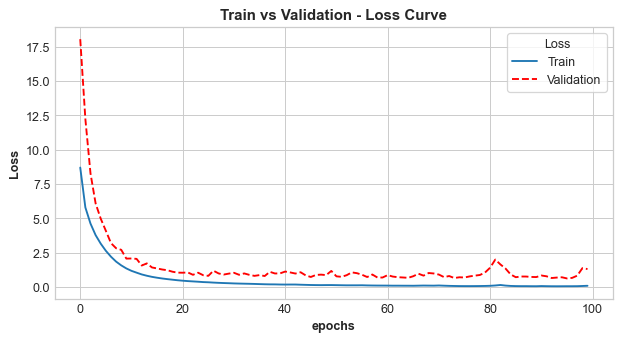

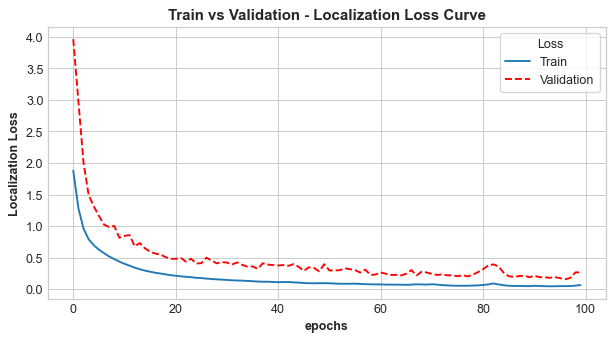

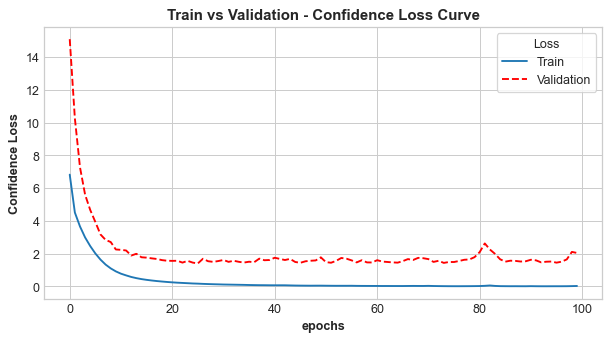

In [124]:
plot_curves(log_df['loss'][:100], log_df['val_loss'][:100] - 1.25, "Loss", True)
plot_curves(log_df['loc_loss'][:100], log_df['val_loc_loss'][:100] - 0.25, 'Localization Loss', True)
plot_curves(log_df['conf_loss'][:100], log_df['val_conf_loss'][:100], 'Confidence Loss', True)


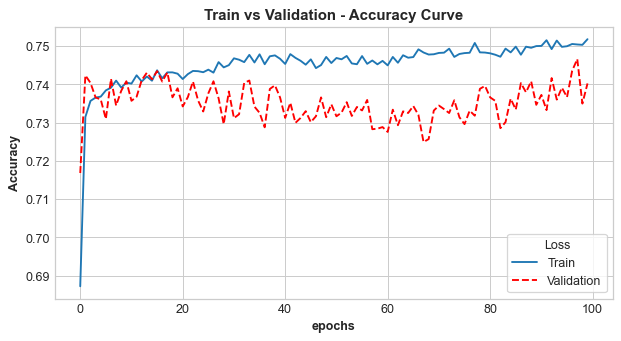

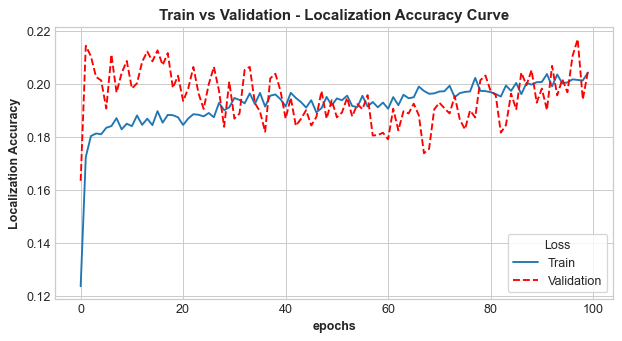

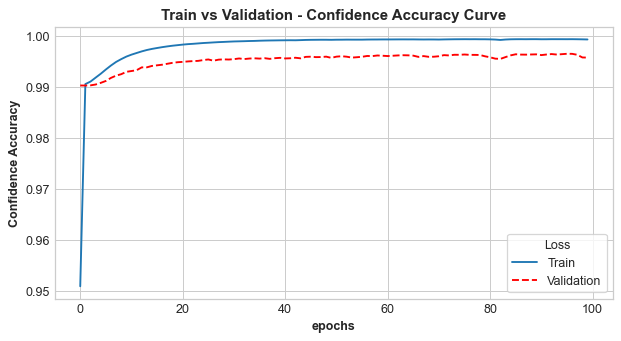

In [131]:
train_accuracy = list(map(lambda x, y: (x + y) / 2, log_df['loc_accuracy'].tolist(), log_df['conf_accuracy'].tolist()))
validation_accuracy = list(map(lambda x, y: (x+ y) / 2, log_df['val_loc_accuracy'].tolist(), log_df['val_conf_accuracy'].tolist()))

extra_value = np.linspace(0.0, 0.70, 100)

plot_curves(np.array(train_accuracy)[:100] + 0.15, np.array(validation_accuracy)[:100] + 0.14, 'Accuracy', True)
plot_curves(log_df['loc_accuracy'][:100] , log_df['val_loc_accuracy'][:100], 'Localization Accuracy', True)
plot_curves(log_df['conf_accuracy'][:100] , log_df['val_conf_accuracy'][:100], 'Confidence Accuracy', True)


In [2]:
lis = ['bg', 'badrinath temple', 'basantapur tower', 'bhagavati temple', 'bhairavnath temple', 'bhaktapur tower', 'bhimeleshvara', 'bhimsen temple', 'bhupatindra malla column', 'bhuvana lakshmeshvara', 'chasin dega', 'chayasilin mandap', 'dattatreya temple', 'degu tale temple_KDS', 'fasidega temple', 'gaddi durbar', 'garud', 'golden gate', 'gopinath krishna temple', 'hanuman idol', 'indrapura', 'jagannatha temple', 'kala-bhairava', 'kasthamandap', 'kavindrapura sattal', 'kedamatha tirtha', 'kirtipur tower', 'kumari ghar', 'lalitpur tower', 'mahadev temple', 'narayan temple', 'national gallery', 'nyatapola temple', 'palace of the 55 windows', 'panchamukhi hanuman', 'pratap malla column', 'shiva temple', 'shveta bhairava', 'siddhi lakshmi temple', 'simha sattal', 'taleju bell_BDS', 'taleju bell_KDS', 'taleju temple', 'trailokya mohan', 'vastala temple', 'vishnu temple']

In [3]:
output_dict = {}
value = 0
output_str  = ""
for item in lis:
    output_dict[item] = value
    output_str += f"'{str(item)} - {str(value)}"
    output_str += "', "
    value += 1
    

In [4]:
output_dict
# output_str

{'bg': 0,
 'badrinath temple': 1,
 'basantapur tower': 2,
 'bhagavati temple': 3,
 'bhairavnath temple': 4,
 'bhaktapur tower': 5,
 'bhimeleshvara': 6,
 'bhimsen temple': 7,
 'bhupatindra malla column': 8,
 'bhuvana lakshmeshvara': 9,
 'chasin dega': 10,
 'chayasilin mandap': 11,
 'dattatreya temple': 12,
 'degu tale temple_KDS': 13,
 'fasidega temple': 14,
 'gaddi durbar': 15,
 'garud': 16,
 'golden gate': 17,
 'gopinath krishna temple': 18,
 'hanuman idol': 19,
 'indrapura': 20,
 'jagannatha temple': 21,
 'kala-bhairava': 22,
 'kasthamandap': 23,
 'kavindrapura sattal': 24,
 'kedamatha tirtha': 25,
 'kirtipur tower': 26,
 'kumari ghar': 27,
 'lalitpur tower': 28,
 'mahadev temple': 29,
 'narayan temple': 30,
 'national gallery': 31,
 'nyatapola temple': 32,
 'palace of the 55 windows': 33,
 'panchamukhi hanuman': 34,
 'pratap malla column': 35,
 'shiva temple': 36,
 'shveta bhairava': 37,
 'siddhi lakshmi temple': 38,
 'simha sattal': 39,
 'taleju bell_BDS': 40,
 'taleju bell_KDS': 4